In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
data = pd.read_csv('./user_data/final/KBAI_combined_v2.csv')
print(len(data))

344


In [4]:
data.head()

,user_name,id,label,type,type_data,grade_bucket,age_bucket,gender,eng_fluency,highest_degree,...,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor
0,User99,User99,User99,student,user_graph,b,25 to 34,Male,Native speaker,Bachelors Degree,...,0,0,0.000000,0,2,0,4.67,NaN,NaN,NaN
1,User98,User98,User98,student,user_graph,a,18 to 24,Male,Native speaker,Bachelors Degree,...,4,26,0.270833,0,4,-2,1.60,0,5,4
2,User97,User97,User97,student,user_graph,b,35 to 44,Male,Native speaker,Bachelors Degree,...,2,29,0.290909,20,2,0,1.00,0,3,4
3,User96,User96,User96,student,user_graph,c,25 to 34,Male,Fully fluent (non-native speaker),Doctoral Degree,...,3,30,0.297872,0,1,1,2.20,0,4,4
4,User95,User95,User95,student,user_graph,b,25 to 34,Male,Fully fluent (non-native speaker),Bachelors Degree,...,0,31,0.000000,0,1,-1,1.80,1,5,3


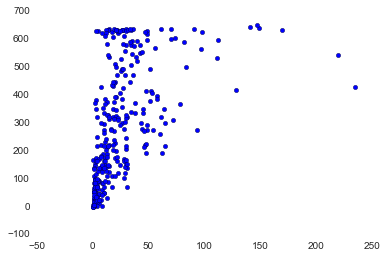

In [5]:
# scatter to guess clusters
plt.scatter(data['posts'], data['views'])
plt.show()

In [6]:
d2 = data.fillna(0)
d2.head()

,user_name,id,label,type,type_data,grade_bucket,age_bucket,gender,eng_fluency,highest_degree,...,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor
0,User99,User99,User99,student,user_graph,b,25 to 34,Male,Native speaker,Bachelors Degree,...,0,0,0.000000,0,2,0,4.67,0,0,0
1,User98,User98,User98,student,user_graph,a,18 to 24,Male,Native speaker,Bachelors Degree,...,4,26,0.270833,0,4,-2,1.60,0,5,4
2,User97,User97,User97,student,user_graph,b,35 to 44,Male,Native speaker,Bachelors Degree,...,2,29,0.290909,20,2,0,1.00,0,3,4
3,User96,User96,User96,student,user_graph,c,25 to 34,Male,Fully fluent (non-native speaker),Doctoral Degree,...,3,30,0.297872,0,1,1,2.20,0,4,4
4,User95,User95,User95,student,user_graph,b,25 to 34,Male,Fully fluent (non-native speaker),Bachelors Degree,...,0,31,0.000000,0,1,-1,1.80,1,5,3


In [7]:
#record No.
# d2.ix[9, :]

In [8]:
X = d2.ix[:, 27:].as_matrix(columns=None)
X

array([[  90.  ,   61.98,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [ 134.  ,   73.12,    0.  , ...,    0.  ,    5.  ,    4.  ],
       [ 126.  ,   66.1 ,    1.  , ...,    0.  ,    3.  ,    4.  ],
       ..., 
       [ 140.  ,   68.24,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,   60.15,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [  87.  ,   70.38,    0.  , ...,    0.  ,    0.  ,    0.  ]])

ward 0.658862968429
Dendogram


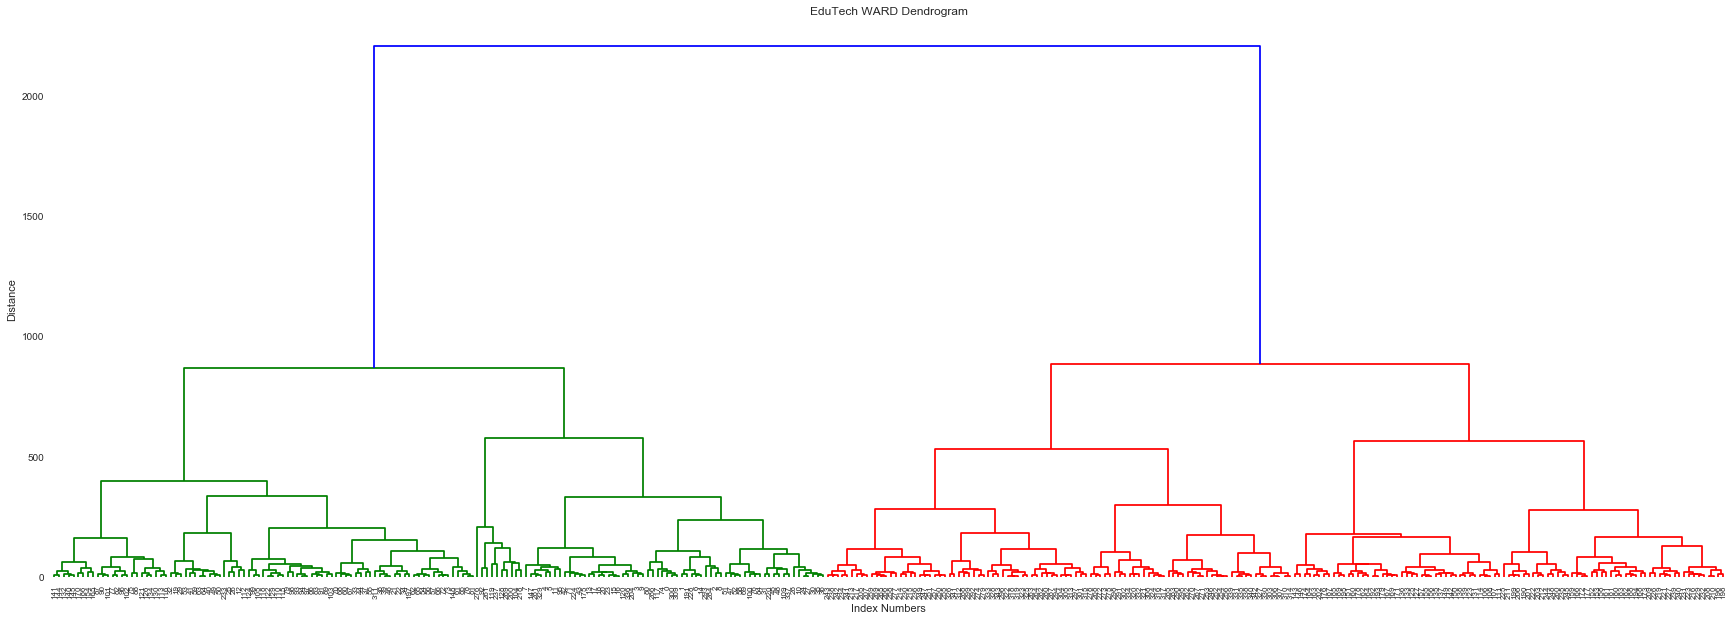

complete 0.649341361644
Dendogram


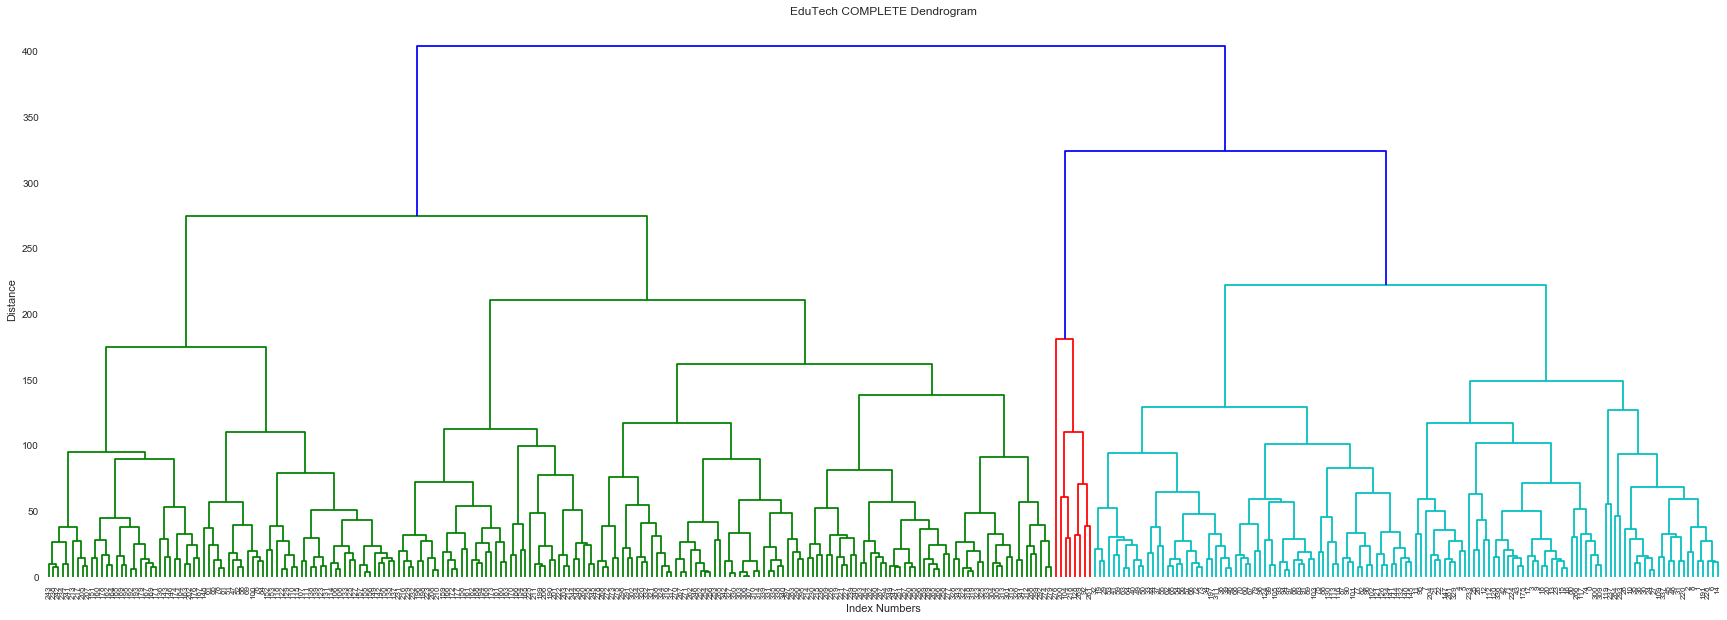

single 0.354380990286
Dendogram


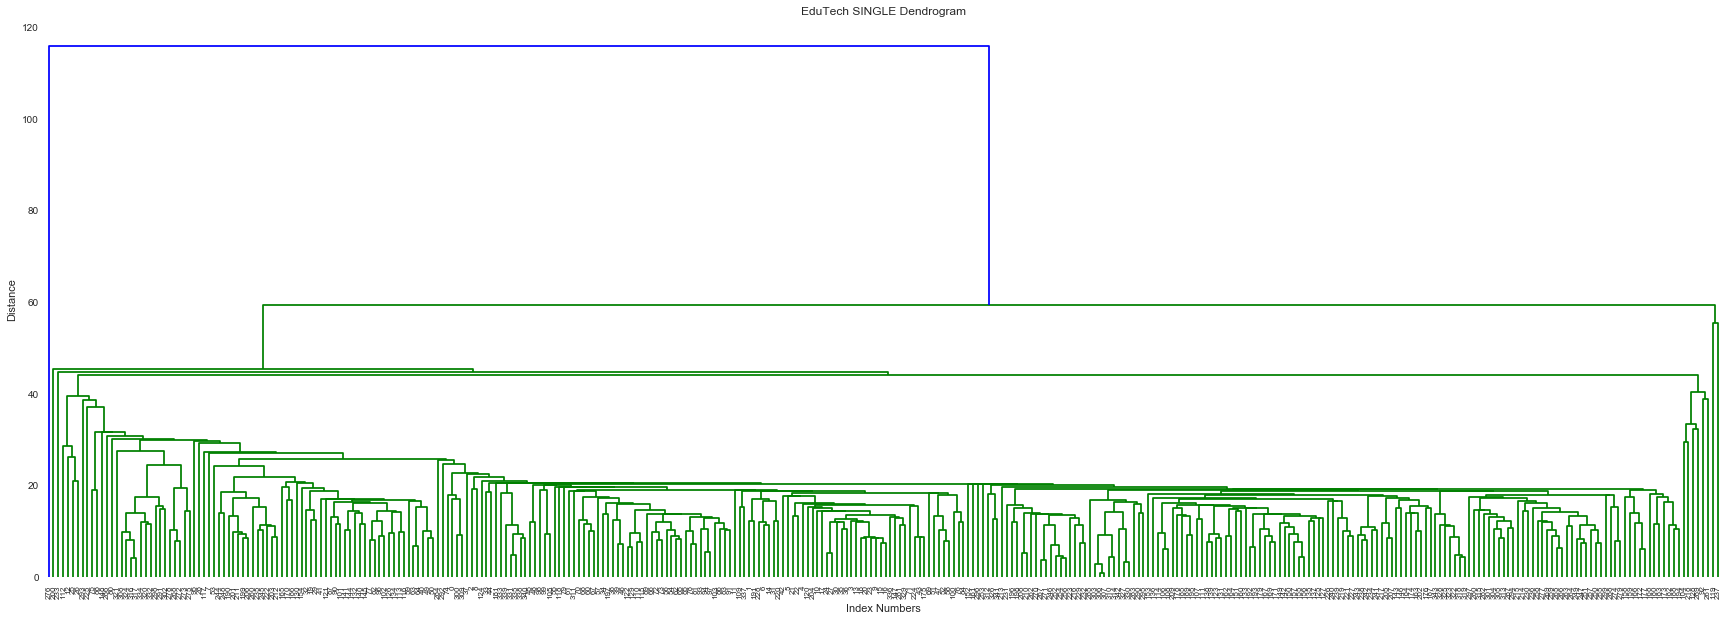

In [9]:
####################### ITERATE THROUGH DISTNACES ################################
from sklearn.grid_search import GridSearchCV
distances = ['ward','complete','single']
for i in distances:
    Z = linkage(X, i)
    c, coph_dists = cophenet(Z, pdist(X))
    print i,c
    print "Dendogram"
    plt.figure(figsize=(30, 10))
    plt.title('EduTech {} Dendrogram'.format(i.upper()))
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
#     print 'Truncated'
#     plt.title('Truncated Dendrogram')
#     plt.xlabel('Index Numbers')
#     plt.ylabel('Distance')
#     dendrogram(
#         Z,
#         truncate_mode='lastp',  
#         p=15,  
#         show_leaf_counts=False,  
#         leaf_rotation=90.,
#         leaf_font_size=12.,
#         show_contracted=True,  
#     )
#     plt.show()

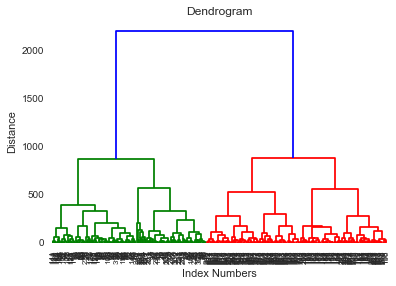

In [10]:
Z = linkage(X, 'ward')
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [11]:
max_dist = 450
clusters = fcluster(Z, max_dist, criterion='distance')
print np.unique(clusters)
print clusters

[1 2 3 4 5 6 7]
[3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 1 1 3 3 1 1 3 3 1 3 3 1 1 1 3 3
 1 1 1 1 1 3 3 1 3 1 3 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1
 3 1 3 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 3 1 1 1 2 1 6 6 6 3 1
 6 1 1 6 1 1 3 1 2 3 1 1 6 1 6 1 6 2 1 1 6 1 6 1 6 6 6 6 6 1 1 6 6 1 1 6 3
 1 6 6 6 7 7 1 6 6 6 7 7 6 7 6 6 6 1 7 6 7 6 1 6 7 7 6 3 6 7 6 6 7 7 7 7 6
 6 1 6 7 6 7 3 6 6 7 6 7 1 7 7 2 7 6 7 3 4 7 4 7 7 7 7 7 4 4 4 7 4 2 7 3 7
 7 7 3 7 7 7 3 7 4 7 7 1 4 7 4 2 4 7 7 4 4 4 7 7 5 4 7 4 4 4 5 5 5 4 5 4 4
 4 7 2 5 4 4 4 4 5 5 4 5 5 5 5 4 5 2 4 5 4 4 3 4 5 3 5 3 4 4 2 5 5 4 3 4 5
 4 4 5 4 3 4 5 5 4 4 5 5 5 3 5 1 4 4 5 4 5 5 4 4 5 5 4 4 5 4 4 5 4 3 5 5 5
 4 5 5 3 3 5 5 5 4 5 4]


In [12]:
#apply clusters and get group averages
d2['hclusters'] = clusters
d2.head()

,user_name,id,label,type,type_data,grade_bucket,age_bucket,gender,eng_fluency,highest_degree,...,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor,hclusters
0,User99,User99,User99,student,user_graph,b,25 to 34,Male,Native speaker,Bachelors Degree,...,0,0.000000,0,2,0,4.67,0,0,0,3
1,User98,User98,User98,student,user_graph,a,18 to 24,Male,Native speaker,Bachelors Degree,...,26,0.270833,0,4,-2,1.60,0,5,4,3
2,User97,User97,User97,student,user_graph,b,35 to 44,Male,Native speaker,Bachelors Degree,...,29,0.290909,20,2,0,1.00,0,3,4,3
3,User96,User96,User96,student,user_graph,c,25 to 34,Male,Fully fluent (non-native speaker),Doctoral Degree,...,30,0.297872,0,1,1,2.20,0,4,4,3
4,User95,User95,User95,student,user_graph,b,25 to 34,Male,Fully fluent (non-native speaker),Bachelors Degree,...,31,0.000000,0,1,-1,1.80,1,5,3,3


In [13]:
#add categorical value indicators and re-do hierarchical clustering

In [14]:
#get list of all attributes
#list(d2.ix[:, 27:].columns)

In [15]:
#all vars
aggregation1 = {'id': 'count',
               'engfluency_boolean': 'count', 'male_boolean': 'count', 
              'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'eccentricity': 'mean','closnesscentrality':'mean',
               'harmonicclosnesscentrality': 'mean',
               'betweenesscentrality': 'mean',
               'componentnumber':'mean', 'strongcompnum':'mean',
               'modularity_class': 'mean','num_previous_OMSCS':'mean',
               'num_other_courses': 'mean','confi_avg': 'mean',
               'confi_var': 'mean','confi_startend_diff': 'mean',
               'quarter_confidence': 'mean','quarter_future_confidence': 'mean',
               'mid_confidence':'mean','mid_future_confidence': 'mean',
               'end_confidence': 'mean','pace_avg': 'mean', 'pac_var': 'mean',
               'pac_endstart_diff': 'mean','quarter_pace_eval': 'mean',
               'mid_pace_eval': 'mean', 'end_pace': 'mean','rigor_avg': 'mean',
               'rigor_var': 'mean','rigor_endstart_diff': 'mean',
               'quarter_rigor_eval': 'mean','mid_rigor_eval': 'mean',
               'end_rigor': 'mean', 'cal_hr_expected_calc_change':'mean',
               'end_expect_project_meet_num': 'mean',
               'end_expect_project_exceed_num': 'mean'}

In [16]:
#filtered vars
aggregation2 = {'id': 'count',
               'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'closnesscentrality':'mean',
               'betweenesscentrality': 'mean',
                'strongcompnum':'mean', 'num_previous_OMSCS':'mean',
               'confi_avg': 'mean','confi_startend_diff': 'mean',
                'end_pace': 'mean','end_rigor': 'mean', 
                'cal_hr_expected_calc_change':'mean'}

In [17]:
grp = d2.groupby('hclusters')
hcluster_grp = grp.agg(aggregation2)
hcluster_grp.to_csv('./user_data/final/edutech_hclsuter_output_v3.csv')

In [18]:
hcluster_grp

strongcompnum confi_startend_diff  end_pace     degree      asks  \
                   mean                mean      mean       mean      mean   
hclusters                                                                    
1            111.195402           -0.126437  3.287356   0.413793  0.873563   
2             33.000000           -0.200000  2.600000  10.900000  8.600000   
3             43.612903           -0.290323  3.322581   2.500000  3.403226   
4            283.833333            0.203704  2.222222   0.555556  1.888889   
5            304.095238           -0.023810  1.476190   0.047619  0.309524   
6            177.441860           -0.023256  3.883721   0.790698  2.093023   
7            222.413043           -0.434783  3.760870   0.000000  0.760870   

                views  indegree betweenesscentrality confi_avg       posts  \
                 mean      mean                 mean      mean        mean   
hclusters                                                                    
1          133.091954  0.229885             0.950192  2.325057    8.482759   
2          483.200000  6.300000           143.041667  2.240000  100.500000   
3          394.080645  1.532258             4.837366  2.140323   37.596774   
4          427.981481  0.037037             0.018519  1.285556   31.203704   
5           91.547619  0.000000             0.000000  0.894048    5.214286   
6          382.558140  0.069767             0.023256  2.324884   31.511628   
7           88.130435  0.000000             0.000000  2.347391    6.043478   

               ...         answers outdegree end_rigor closnesscentrality  \
               ...            mean      mean      mean               mean   
hclusters      ...                                                          
1              ...        0.275862  0.183908  3.206897           0.071151   
2              ...        4.300000  4.600000  3.100000           0.450285   
3              ...        0.790323  0.967742  3.000000           0.209860   
4              ...        1.370370  0.518519  2.055556           0.225308   
5              ...        0.142857  0.047619  1.428571           0.008282   
6              ...        0.930233  0.720930  3.813953           0.202715   
7              ...        0.173913  0.000000  3.673913           0.000000   

          cal_hr_expected_calc_change    id num_previous_OMSCS     finalgrade  \
                                 mean count               mean finalgrade_min   
hclusters                                                                       
1                            0.206897    87           1.793103           0.00   
2                            0.700000    10           2.000000          55.57   
3                            0.370968    62           1.758065          49.92   
4                            0.574074    54           0.962963          50.68   
5                            0.285714    42           0.904762           0.00   
6                            1.069767    43           1.697674          56.64   
7                            1.304348    46           1.717391           0.00   

                                         
          finalgrade_max finalgrade_avg  
hclusters                                
1                  73.89      32.754253  
2                  72.06      67.142000  
3                  76.18      64.292581  
4                  75.72      64.066296  
5                  74.19      38.454762  
6                  75.11      65.463256  
7                  77.09      42.820435  

[7 rows x 21 columns]

In [19]:
# plt.scatter(d2.ix[:,'finalgrade'], d2.ix[:,'views'], c=clusters, cmap='prism')
# plt.show()

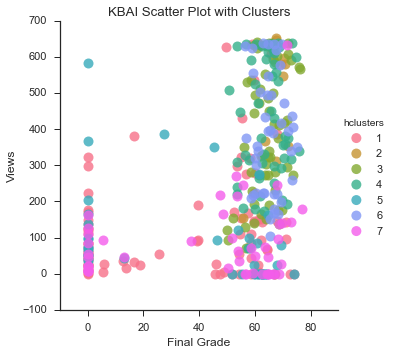

In [21]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('finalgrade', 'views', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('KBAI Scatter Plot with Clusters')
plt.xlabel('Final Grade')
plt.ylabel('Views')

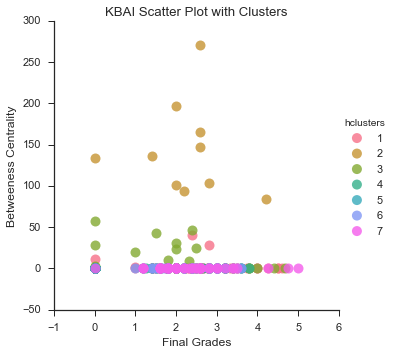

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('confi_avg', 'betweenesscentrality', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('KBAI Scatter Plot with Clusters')
plt.xlabel('Final Grades')
plt.ylabel('Betweeness Centrality')

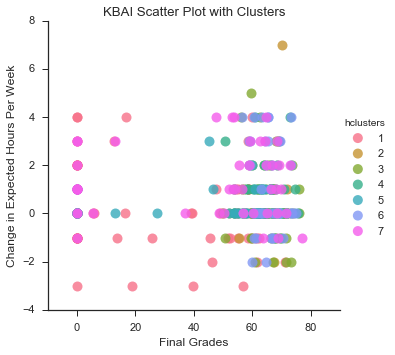

In [23]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('finalgrade', 'cal_hr_expected_calc_change', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('KBAI Scatter Plot with Clusters')
plt.xlabel('Final Grades')
plt.ylabel('Change in Expected Hours Per Week')

In [24]:
#Running treees on the clustered dataset 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.feature_extraction import DictVectorizer

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [45]:
#target values are clusters 
# X2 = d2.ix[:, 27:-1].as_matrix(columns=None) #removes hclusters
# Xnorm = normalize(X2)
# target = d2.ix[:, -1].as_matrix(columns=None)

In [57]:
def tonumeric(val): 
    grade_dict = {'a': 1, 'b': 2, 'c':3, 'd': 4, 'e': 5}
    if val: 
        return grade_dict[val]
    else:
        return 0


In [58]:
#target values are grade buckets, remove final grade 
dtemp = d2.ix[:, 27:-1]
del dtemp['finalgrade']
X2 = dtemp.as_matrix(columns=None)
Xnorm = normalize(X2)

In [59]:
target = d2.ix[:, 'grade_bucket'].apply(lambda x: tonumeric(x)).as_matrix(columns=None)

In [60]:
Xnorm

array([[ 0.99841066,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97918184,  0.        ,  0.02922931, ...,  0.        ,
         0.03653664,  0.02922931],
       [ 0.96205396,  0.00763535,  0.00763535, ...,  0.        ,
         0.02290605,  0.0305414 ],
       ..., 
       [ 0.38074558,  0.        ,  0.00271961, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24653412,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
trees = ExtraTreesClassifier()

In [62]:
#create train test split and fit to the model
x_train, x_test, y_train, y_test = train_test_split(Xnorm,target,test_size = .33, random_state = 1)
trees.fit(x_train, y_train) 

#fit tree only
# trees.fit(X2, target) 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
# testing
# y_pred = trees.predict(x_test)
# y_pred

cv = cross_val_score(trees, Xnorm,target, cv=5)
print cv
print np.mean(cv)

[ 0.36111111  0.35714286  0.41176471  0.40298507  0.41791045]
0.390182839305


In [55]:
importances = trees.feature_importances_
importances_names = d2.ix[:, 27:-1].columns
#importances_names = dtemp.columns


print(importances, len(importances))
print(importances_names, len(importances_names))

(array([ 0.12719482,  0.21976515,  0.01510722,  0.03163037,  0.03102484,
        0.12510085,  0.02624663,  0.01102961,  0.07610161,  0.06415169,
        0.08789994,  0.05627921,  0.05637209,  0.07209599]), 14)
(Index([u'days', u'finalgrade', u'indegree', u'outdegree', u'degree',
       u'strongcompnum', u'closnesscentrality', u'betweenesscentrality',
       u'num_previous_OMSCS', u'cal_hr_expected_calc_change', u'confi_avg',
       u'confi_startend_diff', u'end_pace', u'end_rigor'],
      dtype='object'), 14)


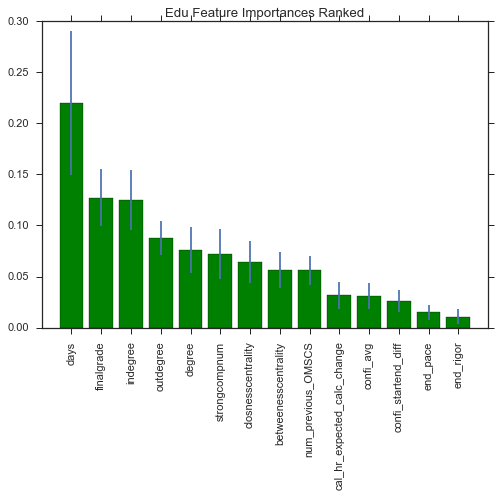

In [56]:
#graph feature importance for 
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in trees.estimators_],
             axis=0)

plt.figure()
plt.title("Edu Feature Importances Ranked")
plt.bar(range(X2.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), importances_names, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()